<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Histogram**


Estimated time needed: **45** minutes


In this lab, you will focus on the visualization of data. The dataset will be provided through an RDBMS, and you will need to use SQL queries to extract the required data.


## Objectives


In this lab, you will perform the following:


- Visualize the distribution of data using histograms.

- Visualize relationships between features.

- Explore data composition and comparisons.


## Demo: Working with database


#### Download the database file.


In [1]:
!wget -O survey-data.sqlite https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite

--2026-01-17 02:12:22--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/QR9YeprUYhOoLafzlLspAw/survey-results-public.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 211415040 (202M) [application/octet-stream]
Saving to: ‘survey-data.sqlite’

survey-data.sqlite  100%[===================>] 201.62M  61.1MB/s    in 3.3s    

2026-01-17 02:12:26 (61.3 MB/s) - ‘survey-data.sqlite’ saved [211415040/211415040]



#### Install the required libraries and import them


In [2]:
!pip install pandas

In [3]:
!pip install matplotlib
!pip install seaborn

In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Connect to the SQLite database


In [5]:
conn = sqlite3.connect('survey-data.sqlite')

## Demo: Basic SQL queries

**Demo 1: Count the number of rows in the table**


In [6]:
QUERY = "SELECT COUNT(*) FROM main"
df = pd.read_sql_query(QUERY, conn)
print(df)


   COUNT(*)
0     65437


**Demo 2: List all tables**


In [7]:
QUERY = """
SELECT name as Table_Name 
FROM sqlite_master 
WHERE type = 'table'
"""
pd.read_sql_query(QUERY, conn)


,Table_Name
0,main


**Demo 3: Group data by age**


In [8]:
QUERY = """
SELECT Age, COUNT(*) as count 
FROM main 
GROUP BY Age 
ORDER BY Age
"""
df_age = pd.read_sql_query(QUERY, conn)
print(df_age)


                  Age  count
0     18-24 years old  14098
1     25-34 years old  23911
2     35-44 years old  14942
3     45-54 years old   6249
4     55-64 years old   2575
5   65 years or older    772
6   Prefer not to say    322
7  Under 18 years old   2568


## Hands-on Lab: Visualizing Data with Histograms


### 1. Visualizing the distribution of data (Histograms)


**1.1 Histogram of `CompTotal` (Total Compensation)**


Objective: Plot a histogram of `CompTotal` to visualize the distribution of respondents' total compensation.


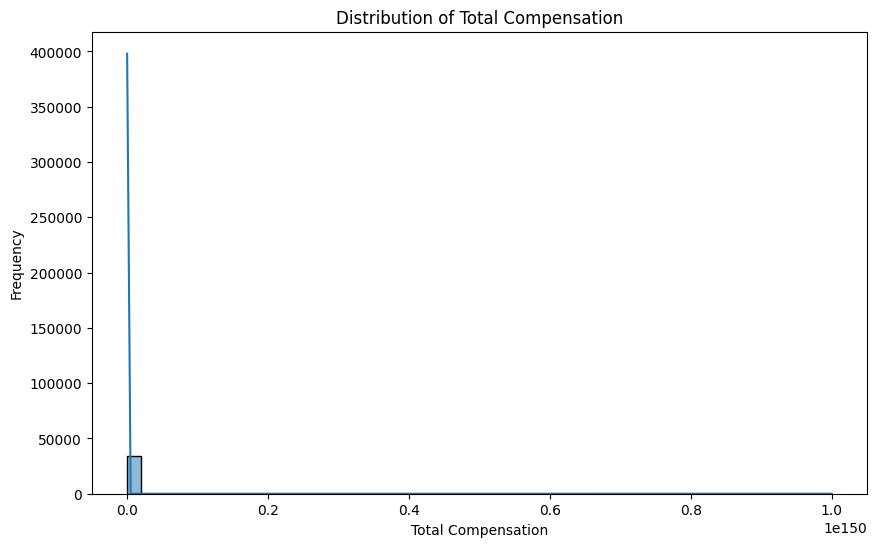

In [10]:
## Write your code here
# Query to get CompTotal
QUERY = "SELECT CompTotal FROM main"
df_comp = pd.read_sql_query(QUERY, conn)

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_comp['CompTotal'].dropna(), bins=50, kde=True)
plt.title('Distribution of Total Compensation')
plt.xlabel('Total Compensation')
plt.ylabel('Frequency')
plt.show()

**1.2 Histogram of YearsCodePro (Years of Professional Coding Experience)**


Objective: Plot a histogram of `YearsCodePro` to analyze the distribution of coding experience among respondents.


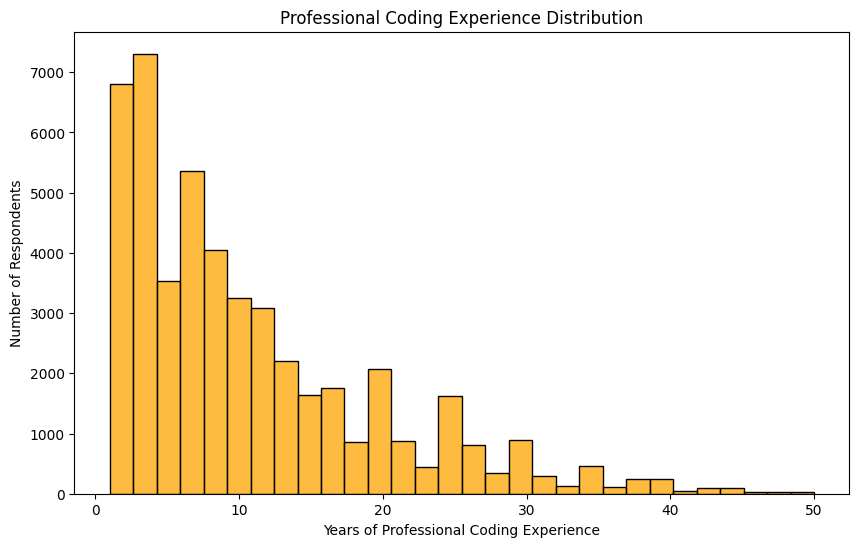

In [16]:
## Write your code here
# Query to get YearsCodePro
QUERY = "SELECT YearsCodePro FROM main"
df_code_pro = pd.read_sql_query(QUERY, conn)

# Convert to numeric as this column often contains strings like "Less than 1 year"
df_code_pro['YearsCodePro'] = pd.to_numeric(df_code_pro['YearsCodePro'], errors='coerce')

# Plotting the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_code_pro['YearsCodePro'].dropna(), bins=30, color='orange')
plt.title('Professional Coding Experience Distribution')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Number of Respondents')
plt.show()

### 2. Visualizing Relationships in Data


**2.1 Histogram Comparison of `CompTotal` by `Age` Group**


Objective: Use histograms to compare the distribution of CompTotal across different Age groups.


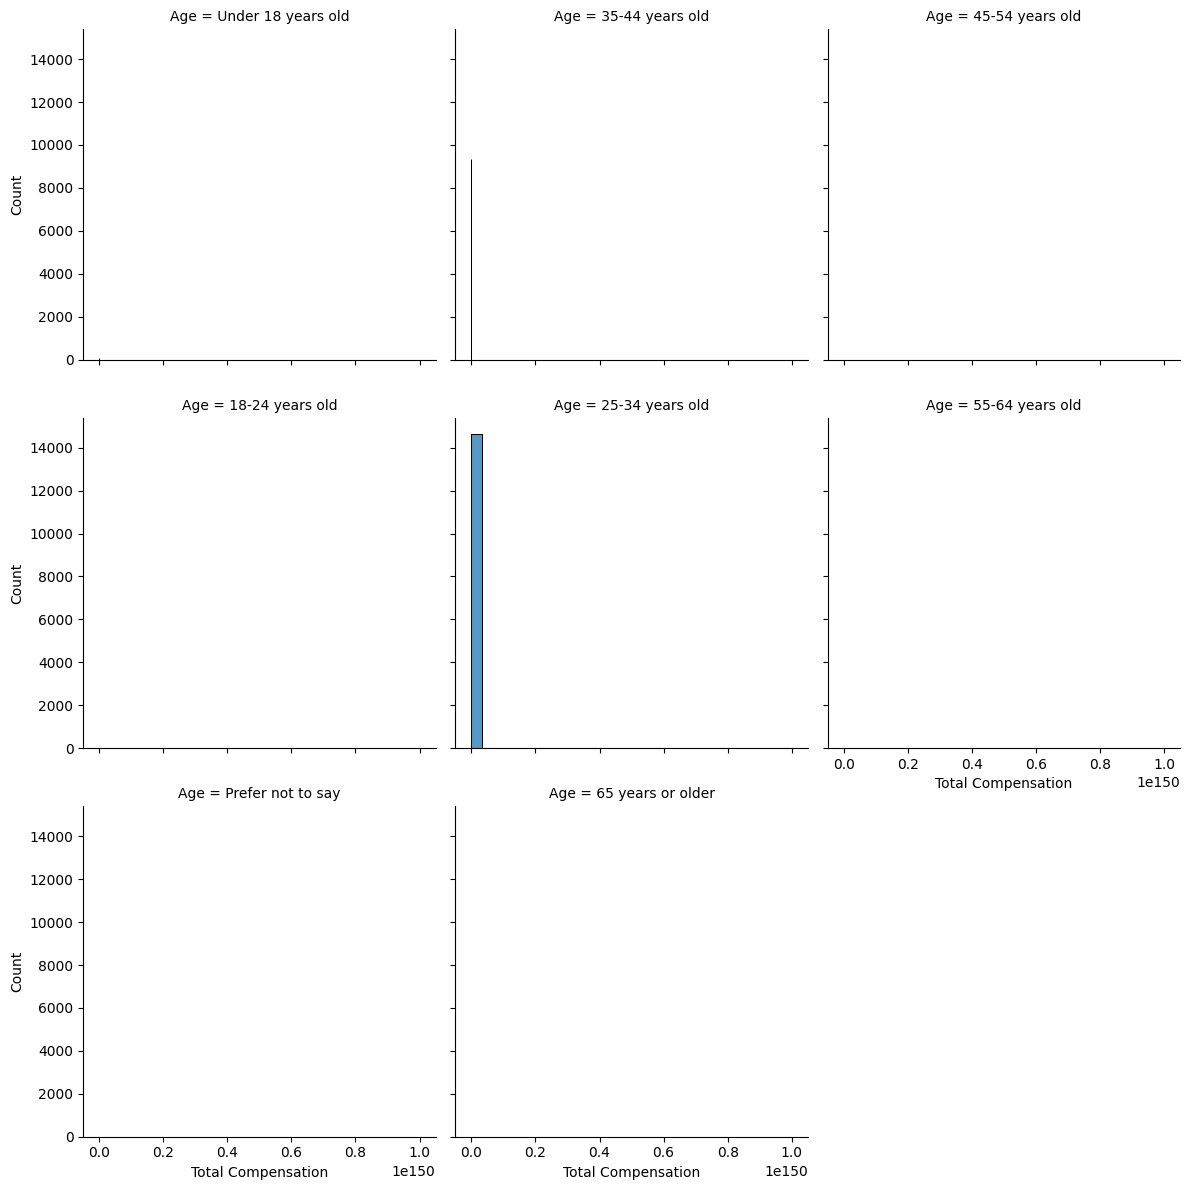

In [17]:
## Write your code here
# Query to get CompTotal and Age
QUERY = "SELECT CompTotal, Age FROM main"
df_age_comp = pd.read_sql_query(QUERY, conn)

# Plotting using FacetGrid to compare across age groups
g = sns.FacetGrid(df_age_comp, col="Age", col_wrap=3, height=4)
g.map(sns.histplot, "CompTotal", bins=30)
g.set_axis_labels("Total Compensation", "Count")
plt.show()

**2.2 Histogram of TimeSearching for Different Age Groups**


Objective: Use histograms to explore the distribution of `TimeSearching` (time spent searching for information) for respondents across different age groups.


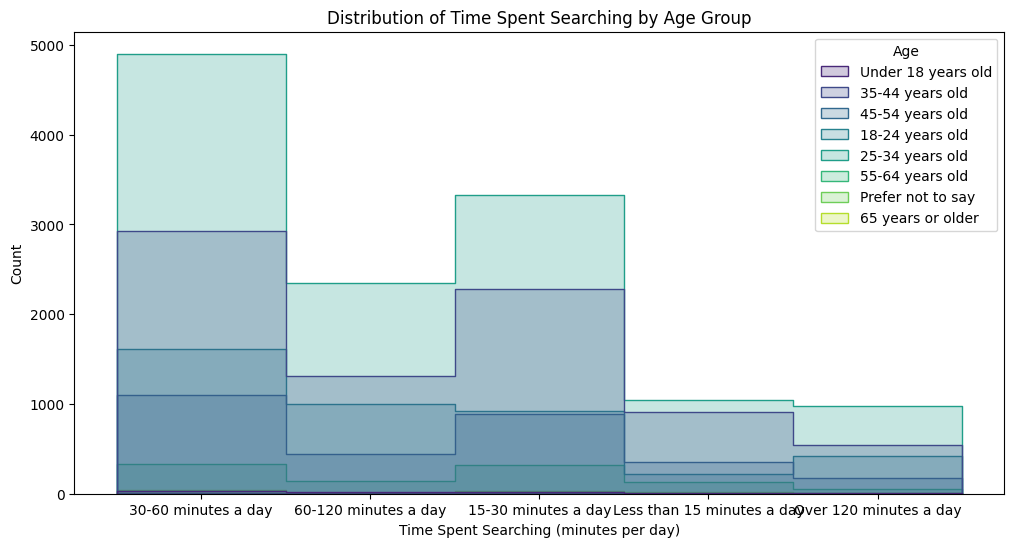

In [18]:
## Write your code here
# Query to get TimeSearching and Age
QUERY = "SELECT TimeSearching, Age FROM main"
df_time = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(12, 6))
sns.histplot(data=df_time, x='TimeSearching', hue='Age', element='step', palette='viridis')
plt.title('Distribution of Time Spent Searching by Age Group')
plt.xlabel('Time Spent Searching (minutes per day)')
plt.show()

### 3. Visualizing the Composition of Data


**3.1 Histogram of Most Desired Databases (`DatabaseWantToWorkWith`)**


Objective: Visualize the most desired databases for future learning using a histogram of the top 5 databases.


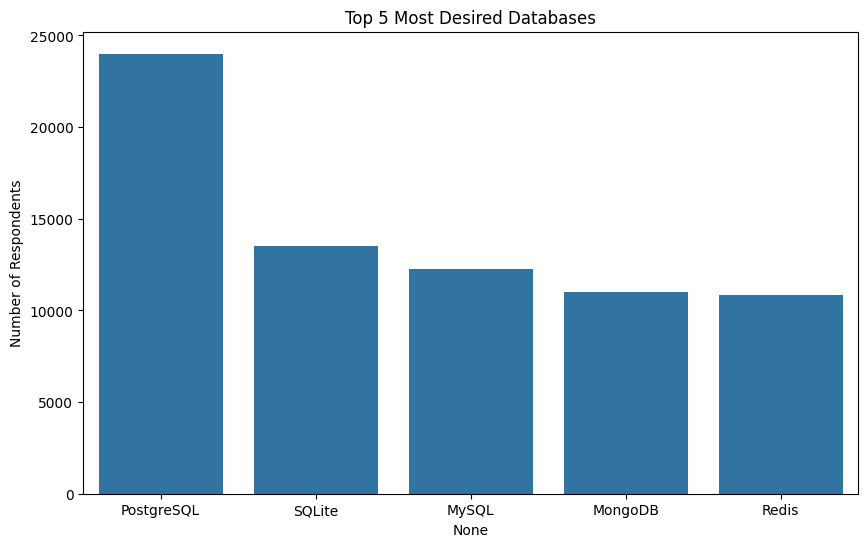

In [20]:
## Write your code here
# Querying and processing multi-select database strings
QUERY = "SELECT DatabaseWantToWorkWith FROM main"
df_db = pd.read_sql_query(QUERY, conn)

# Splitting multi-values and counting top 5
top_dbs = df_db['DatabaseWantToWorkWith'].str.split(';', expand=True).stack().value_counts().head(5)

# Plotting top 5 desired databases
plt.figure(figsize=(10, 6))
sns.barplot(x=top_dbs.index, y=top_dbs.values)
plt.title('Top 5 Most Desired Databases')
plt.ylabel('Number of Respondents')
plt.show()

**3.2 Histogram of Preferred Work Locations (`RemoteWork`)**


Objective: Use a histogram to explore the distribution of preferred work arrangements (`remote work`).


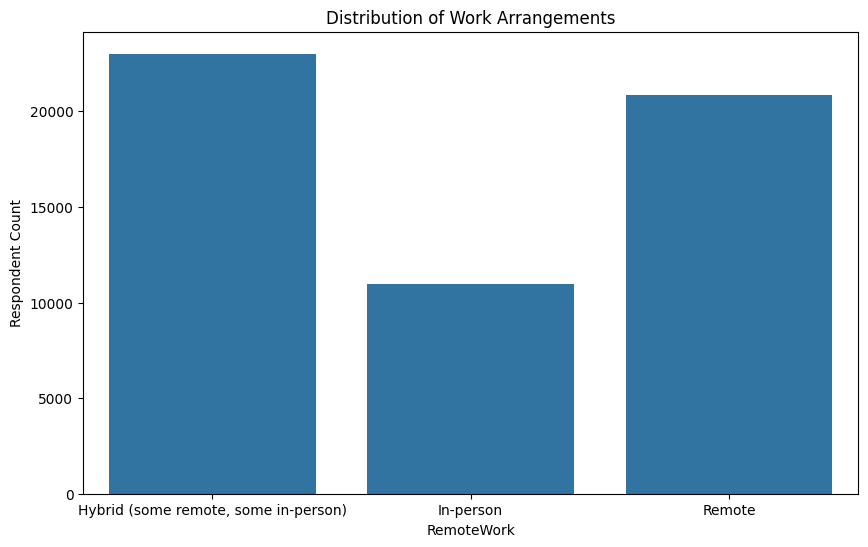

In [21]:
## Write your code here
# Query for RemoteWork distribution
QUERY = "SELECT RemoteWork, COUNT(*) as Count FROM main GROUP BY RemoteWork"
df_remote = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.barplot(x='RemoteWork', y='Count', data=df_remote)
plt.title('Distribution of Work Arrangements')
plt.ylabel('Respondent Count')
plt.show()

### 4. Visualizing Comparison of Data


**4.1 Histogram of Median CompTotal for Ages 45 to 60**


Objective: Plot the histogram for `CompTotal` within the age group 45 to 60 to analyze compensation distribution among mid-career respondents.


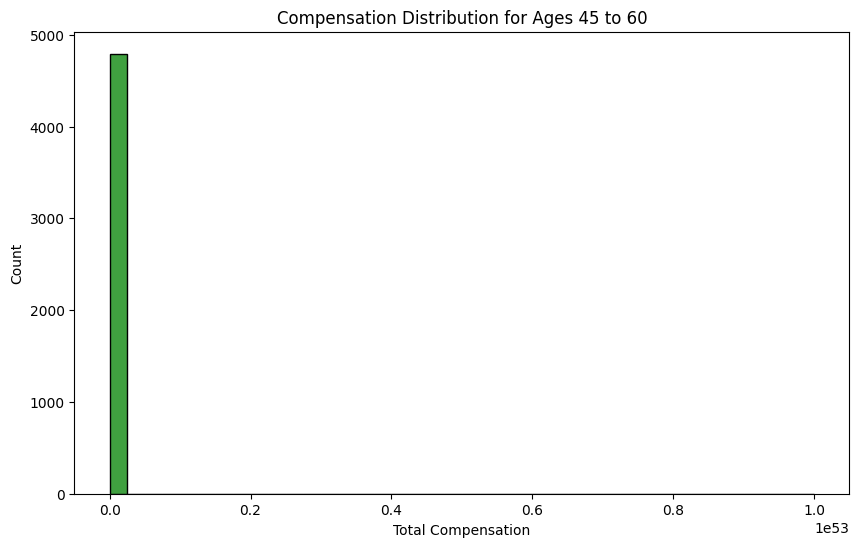

In [22]:
## Write your code here
# Querying for mid-career respondents
QUERY = "SELECT CompTotal FROM main WHERE Age IN ('45-54 years old', '55-64 years old')"
df_mid_career = pd.read_sql_query(QUERY, conn)

plt.figure(figsize=(10, 6))
sns.histplot(df_mid_career['CompTotal'].dropna(), bins=40, color='green')
plt.title('Compensation Distribution for Ages 45 to 60')
plt.xlabel('Total Compensation')
plt.show()

**4.2 Histogram of Job Satisfaction (`JobSat`) by YearsCodePro**


Objective: Plot the histogram for `JobSat` scores based on respondents' years of professional coding experience.


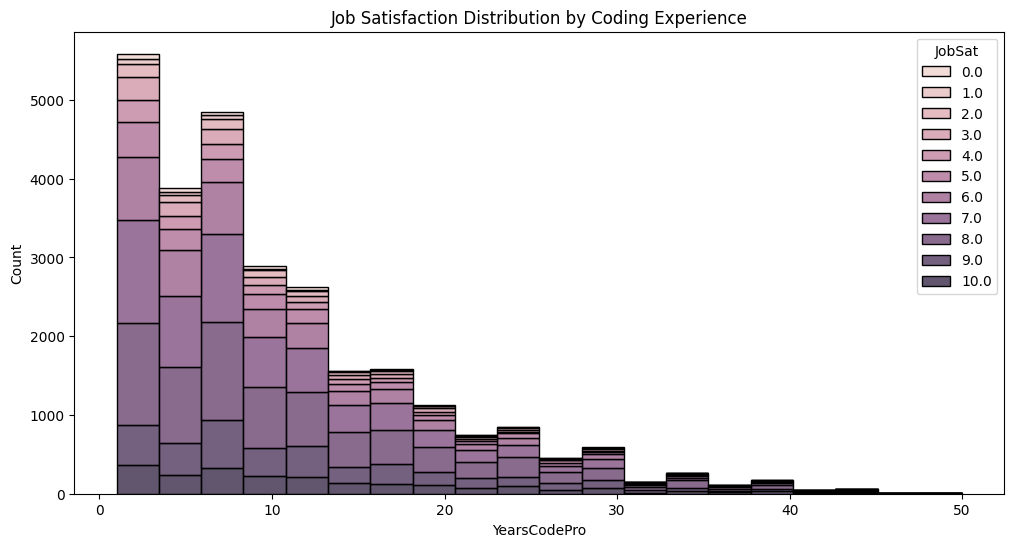

In [23]:
## Write your code here
# Query to get Job Satisfaction and Professional Coding Experience
QUERY = "SELECT JobSat, YearsCodePro FROM main"
df_sat = pd.read_sql_query(QUERY, conn)
df_sat['YearsCodePro'] = pd.to_numeric(df_sat['YearsCodePro'], errors='coerce')

plt.figure(figsize=(12, 6))
sns.histplot(data=df_sat, x='YearsCodePro', hue='JobSat', multiple='stack', bins=20)
plt.title('Job Satisfaction Distribution by Coding Experience')
plt.show()

### Final step: Close the database connection


Once you've completed the lab, make sure to close the connection to the SQLite database:



In [ ]:
conn.close()

### Summary


In this lab, you used histograms to visualize various aspects of the dataset, focusing on:

- Distribution of compensation, coding experience, and work hours.

- Relationships in compensation across age groups and work status.

- Composition of data by desired databases and work environments.

- Comparisons of job satisfaction across years of experience.

Histograms helped reveal patterns and distributions in the data, enhancing your understanding of developer demographics and preferences.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
